***Objective: "Build a model to predict a restaurant’s aggregate rating based on features like cost, cuisine type, location, and services (e.g., table booking, online delivery). This can help restaurant owners understand what drives customer satisfaction."
Write-Up:
"Restaurants vary widely in ratings due to factors like cost, cuisine, and location. This project aims to analyze these factors and predict ratings using machine learning, providing actionable insights for improving customer experience."***

In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Load the dataset
df = pd.read_csv(".././dataset/restaurants.csv" ,encoding='utf-8')

df.head()


First 5 rows of the dataset


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [21]:

print(f"shape: ",{df.shape})
df.columns




shape:  {(9551, 24)}


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cost_USD', 'Cuisine Count', 'Rating Category'],
      dtype='object')

***Data cleaning***


In [4]:
#checking for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
#basic summary statistics
print(df.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [6]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [7]:
#handling the missing values and replacing them with 'Unknown' in the cuisines column
df['Cuisines'] = df['Cuisines'].fillna('Unknown').astype(str)

In [8]:
#handling the missing values
df = df.dropna(subset=['Aggregate rating'])
# df['Aggregate rating'].fillna(df['Aggregate rating'].mean())
df['Average Cost for two'] = df['Average Cost for two'].replace(0, df['Average Cost for two'].median())


In [9]:
#drop duplicates
df = df.drop_duplicates(subset=['Restaurant ID'])
print(f"\nRows after removing duplicates: {df.shape[0]}")
print("\nMissing Values after cleaning:\n", df.isnull().sum())


Rows after removing duplicates: 9551

Missing Values after cleaning:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [10]:
# # Step 3: Simple Standardization
# # Convert Yes/No to 0/1 for key columns
# for col in ['Has Table booking', 'Has Online delivery']:
#     df[col] = df[col].map({'Yes': 1, 'No': 0})


# # Extract primary cuisine
# # df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())
# df.head()

In [ ]:

binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
print("Unique values in binary columns before cleaning:")
for col in binary_cols:
    print(f"{col}: {df[col].unique()}")

for col in binary_cols:
    print(f"Unique values in {col} before mapping: {df[col].unique()}")
    df[col] = df[col].astype(str).str.strip().str.title()
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    df[col] = df[col].fillna(0).astype(int)

print("\nSample of binary columns after mapping:")
print(df[binary_cols].head())


Unique values in binary columns before cleaning:
Has Table booking: [1 0]
Has Online delivery: [0 1]
Is delivering now: [0 1]
Switch to order menu: [0]
Unique values in Has Table booking before mapping: [1 0]
Unique values in Has Online delivery before mapping: [0 1]
Unique values in Is delivering now before mapping: [0 1]
Unique values in Switch to order menu before mapping: [0]

Sample of binary columns after mapping:
   Has Table booking  Has Online delivery  Is delivering now  \
0                  0                    0                  0   
1                  0                    0                  0   
2                  0                    0                  0   
3                  0                    0                  0   
4                  0                    0                  0   

   Switch to order menu  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
   Restaurant ID         Restaurant

In [12]:
#solving typos unicode issues
import unicodedata

# city corrections dictionary
city_corrections = {
    'Bras�_lia': 'Brasília',
    'Brasilia': 'Brasília',
    'Istanbul': 'İstanbul',
    'Istanbull': 'İstanbul',
    'So Paulo': 'São Paulo',  
    'Stanbul': 'İstanbul',    
    'New delhi': 'New Delhi',
    'New dehli': 'New Delhi',
}

df['City'] = df['City'].apply(lambda x: unicodedata.normalize('NFC', str(x)))
df['City'] = df['City'].replace(city_corrections)
df['City'] = df['City'].str.title()
print("\nUnique city names after Unicode normalization and correction:")
print(sorted(df['City'].unique()))


Unique city names after Unicode normalization and correction:
['Abu Dhabi', 'Agra', 'Ahmedabad', 'Albany', 'Allahabad', 'Amritsar', 'Ankara', 'Armidale', 'Athens', 'Auckland', 'Augusta', 'Aurangabad', 'Balingup', 'Bandung', 'Bangalore', 'Beechworth', 'Bhopal', 'Bhubaneshwar', 'Birmingham', 'Bogor', 'Boise', 'Brasília', 'Cape Town', 'Cedar Rapids/Iowa City', 'Chandigarh', 'Chatham-Kent', 'Chennai', 'Clatskanie', 'Cochrane', 'Coimbatore', 'Colombo', 'Columbus', 'Consort', 'Dalton', 'Davenport', 'Dehradun', 'Des Moines', 'Dicky Beach', 'Doha', 'Dubai', 'Dubuque', 'East Ballina', 'Edinburgh', 'Faridabad', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville', 'Ghaziabad', 'Goa', 'Gurgaon', 'Guwahati', 'Hepburn Springs', 'Huskisson', 'Hyderabad', 'Indore', 'Inner City', 'Inverloch', 'Jaipur', 'Jakarta', 'Johannesburg', 'Kanpur', 'Kochi', 'Kolkata', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'London', 'Lorn', 'Lucknow', 'Ludhiana', 'Macedon', 'Macon', 'Makati City', 'Manchester', 'Mandaluyong City',

In [ ]:
#Feature engineerring
# Convert cost to USD (simplified exchange rates)
exchange_rates = {
    'Dollar($)': 1, 'Indian Rupees(Rs.)': 0.012, 'Brazilian Real(R$)': 0.18
}  
df['Cost_USD'] = df.apply(lambda row: row['Average Cost for two'] * exchange_rates.get(row['Currency'], 1), axis=1)

df['Cuisine Count'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')))

df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'])
print("\nSample with New Features:\n", df[['Restaurant Name', 'Cost_USD', 'Cuisine Count', 'Rating Category']].head())




Sample with New Features:
           Restaurant Name  Cost_USD  Cuisine Count Rating Category
0        Le Petit Souffle    1100.0              3            High
1        Izakaya Kikufuji    1200.0              1            High
2  Heat - Edsa Shangri-La    4000.0              4            High
3                    Ooma    1500.0              2            High
4             Sambo Kojin    1500.0              2            High


In [28]:
print("\nData types:\n", df.dtypes)
print("\nOutliers in Cost:\n", df['Average Cost for two'].describe())
print("\nOutliers in Votes:\n", df['Votes'].describe())


Data types:
 Restaurant ID              int64
Restaurant Name           object
Country Code               int64
City                      object
Address                   object
Locality                  object
Locality Verbose          object
Longitude                float64
Latitude                 float64
Cuisines                  object
Average Cost for two       int64
Currency                  object
Has Table booking         object
Has Online delivery       object
Is delivering now         object
Switch to order menu      object
Price range                int64
Aggregate rating         float64
Rating color              object
Rating text               object
Votes                      int64
Cost_USD                 float64
Cuisine Count              int64
Rating Category         category
dtype: object

Outliers in Cost:
 count      9551.000000
mean       1199.210763
std       16121.183073
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000

In [27]:
df.to_csv('restaurants_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'restaurants_cleaned.csv'")


Cleaned dataset saved as 'restaurants_cleaned.csv'


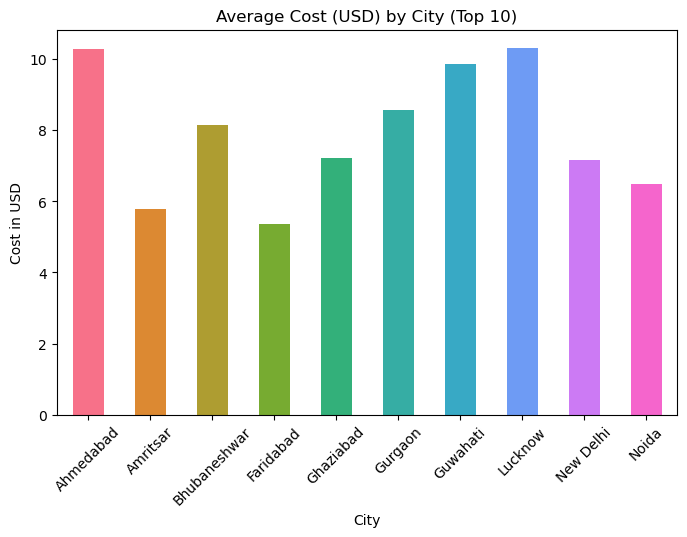

In [20]:
# 1. Bar chart: Average Cost by City (top 10)
top_cities = df['City'].value_counts().head(10).index
city_costs = df[df['City'].isin(top_cities)].groupby('City')['Cost_USD'].mean()
plt.figure(figsize=(8, 5))
city_costs.plot(kind='bar', color=sns.color_palette('husl', len(top_cities)))
plt.title('Average Cost (USD) by City (Top 10)')
plt.ylabel('Cost in USD')
plt.xticks(rotation=45)
plt.savefig('cost_by_city.png')
plt.show()

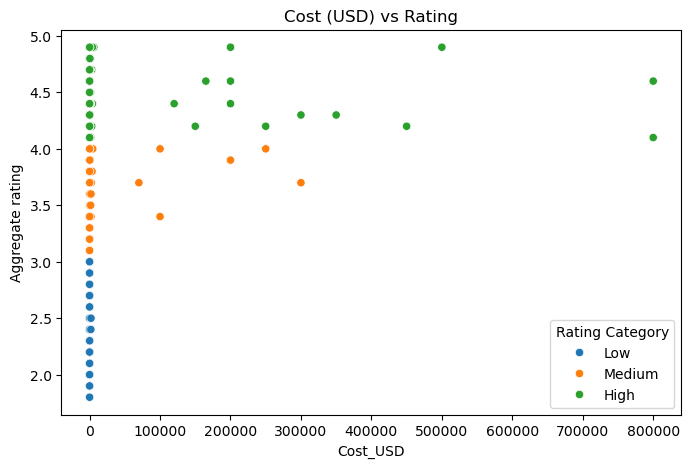

In [15]:
# 2. Scatter plot: Cost vs Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Cost_USD', y='Aggregate rating', hue='Rating Category', data=df)
plt.title('Cost (USD) vs Rating')
plt.savefig('cost_vs_rating.png')
plt.show()

In [16]:
#correlation and covariance analysis
num_f=['Average Cost for two','Votes','Aggregate rating', 'Price range']
corr= df[num_f].corr()
cov=df[num_f].cov()

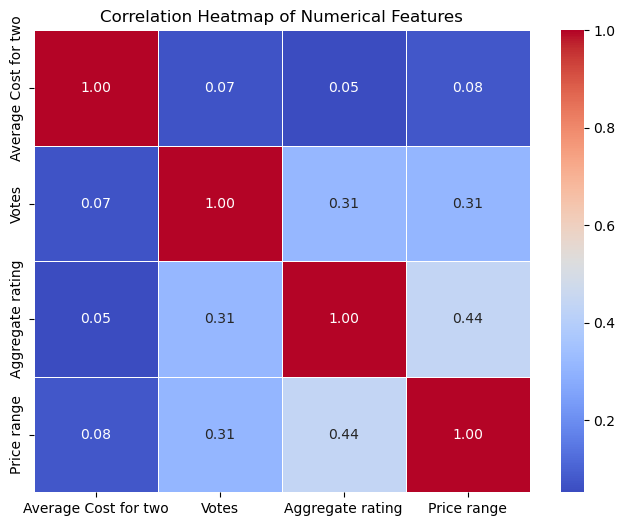

In [17]:

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm",linewidth=.5,fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

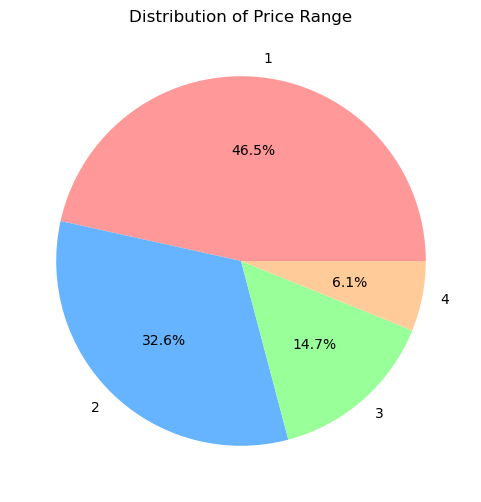

In [18]:
# 4. Pie chart: Distribution of Price Range
plt.figure(figsize=(6, 6))
price_counts = df['Price range'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', 
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])  # 4 colors for 4 price ranges
plt.title('Distribution of Price Range')
plt.savefig('price_range_pie.png')
plt.show()